### 构造神经网络模型对两条曲线数据点进行二分类，详细信息参考博客
https://huizhuzhao.github.io/2017/01/16/neural-networks-manifolds-topology.html

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from jupyter_notebook.utils.matrixops import one_hot_transformer
from jupyter_notebook.utils.data_iterator import ComplexIterator

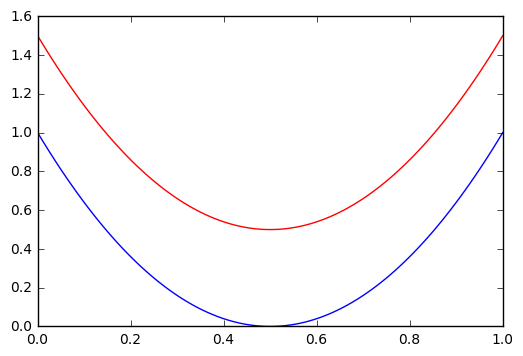

In [63]:
def gen_data_quadratic():
    x = np.linspace(0, 1, 100)
    y1 = (2*(x-0.5))**2
    y2 = (2*(x-0.5))**2 + 0.5
    
    X_1 = np.c_[x, y1]    
    X_2 = np.c_[x, y2]
    y_1 = one_hot_transformer(np.ones_like(x), 2)
    y_2 = one_hot_transformer(np.zeros_like(x), 2)

    return np.concatenate([X_1, X_2], axis=0), np.concatenate([y_1, y_2], axis=0)

X, y = gen_data_quadratic()
plt.plot(X[:100, 0], X[:100, 1])
plt.plot(X[100:, 0], X[100:, 1], 'r')
plt.show()

In [73]:
def build_model():
    model = Sequential()
    model.add(Dense(output_dim=3, input_shape=(2, ), activation='tanh')) # changing output_dim, you test different model
    model.add(Dense(output_dim=2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, data_it, num_batches=10, loop=10):
    loss_metrics = []
    for ii in range(loop):
        tmp_loss_metrics = []
        for jj in range(num_batches):
            batch_x, batch_y = data_it.next()
            batch_loss_metrics = model.train_on_batch(batch_x, batch_y)
            tmp_loss_metrics.append(batch_loss_metrics)
        tmp_loss_metrics = np.mean(np.asarray(tmp_loss_metrics), axis=0)
        loss_metrics.append(tmp_loss_metrics)
    return loss_metrics

def visualize_model(model, x_min, x_max, y_min, y_max, h):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = np.reshape(zz.argmax(axis=1), xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y.argmax(axis=1), cmap=plt.cm.coolwarm)
    plt.show()

In [77]:
batch_size = 10; num_batches = 200; loop = 100
data_it = ComplexIterator([X, y], batch_size=batch_size, shuffle=True, seed=123)
model = build_model()
print X.shape, y.shape
print model.input_shape, model.output_shape

(200, 2) (200, 2)
(None, 2) (None, 2)


In [78]:
loss_metrics = train_model(model, data_it, num_batches, loop)

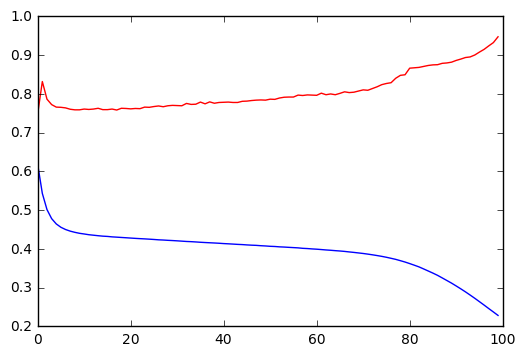

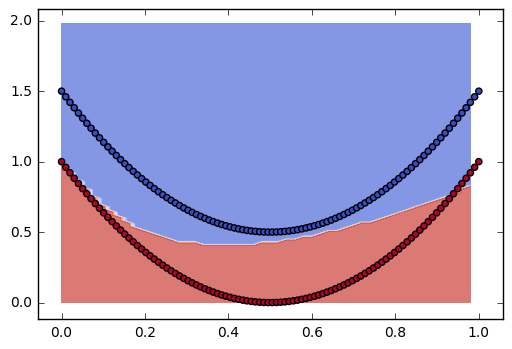

In [79]:
loss_list = [x[0] for x in loss_metrics]
metrics_list = [x[1] for x in loss_metrics]
plt.plot(loss_list)
plt.plot(metrics_list, 'r')
plt.show()
visualize_model(model, 0, 1, 0, 2, 0.02)